### Computing LDR scope from sampling

* Extruder Flowrate - Q (uL/min)
* Gantry Travel Speed - V<sub>g</sub> (mm/min)

In [1]:
%matplotlib widget
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Q = np.arange(50, 1001, 1, dtype=int)
Vg = np.arange(500, 5001, 1, dtype=int)

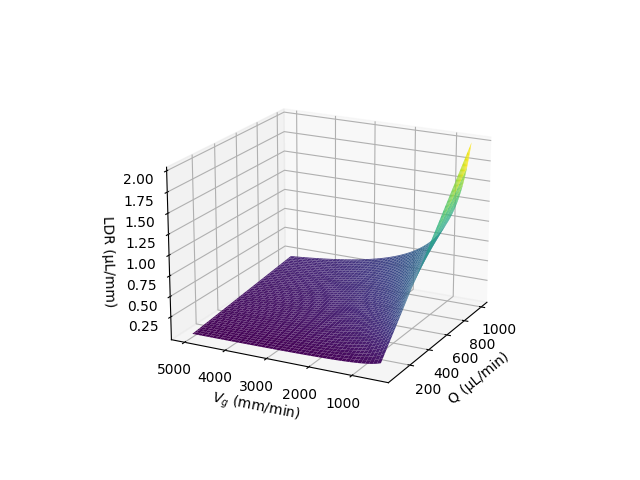

In [2]:
# ---------------Figure 1: Ratio of Flow Rate and Gantry Speed---------------
figure = plt.figure()
ax = plt.axes(projection='3d')

x, y = np.meshgrid(Q, Vg)
z = x/y

ax.plot_surface(x, y, z, cmap='viridis', edgecolor='none')

#ax.set_title('Ratio of Flow Rate and Gantry Speed')
ax.set_zlabel("LDR (uL/mm)")

ax.set_xlabel("Q (uL/min)")
ax.set_ylabel("$V_g$ (mm/min)")

ax.view_init(19, -153)

plt.savefig("Ratio of Flow Rate and Gantry Speed 3D.png",dpi=300)
plt.show()

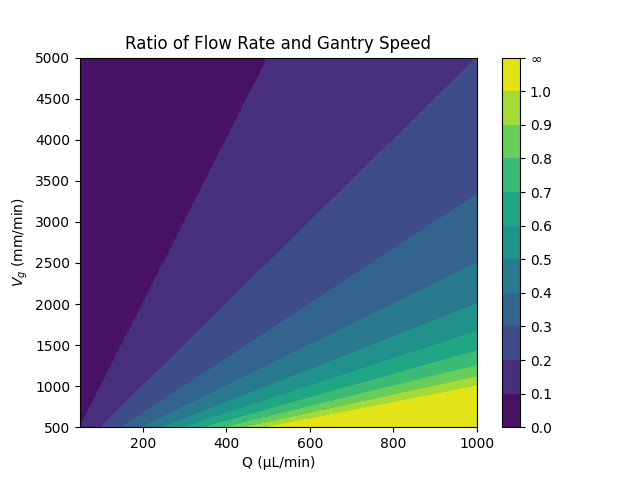

In [3]:
# ---------------Figure 2: Ratio Contour Map---------------
figure = plt.figure()
ax = plt.axes()
x, y = np.meshgrid(Q, Vg)
z = np.zeros(x.shape)

#Increments up until maxVal. Everything above 1 is grouped together
maxVal = 1
increments = 0.1

#The +0.0001 ensures it reaches maxVal as arange doesnt include endpoint
for i in np.arange(0, maxVal+0.0001, increments):
    if i==maxVal:
        z += (increments*0.5+i)*(maxVal < (x/y))
    else:
        z += (increments*0.5+i)*(i < (x/y))*((x/y) <= i+increments)

#Plus increment ot account for values > maxVal
levels = np.arange(0, maxVal+increments+0.0001, increments)
plt.contourf(x, y, z, levels=levels)
cb = plt.colorbar()
cb.set_ticks(levels)

tickLabels=[str(np.round(i,1)) for i in levels]
tickLabels[-1]="$\infty$"
cb.ax.set_yticklabels(tickLabels)

ax.set_title('Ratio of Flow Rate and Gantry Speed')
ax.set_xlabel("Q (uL/min)")
ax.set_ylabel("$V_g$ (mm/min)")

plt.savefig("Ratio of Flow Rate and Gantry Speed 2D.png",dpi=300, bbox_inches='tight')
plt.show()
